In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading the data

In [2]:
files = {
         'confirmed_US': 'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_confirmed_US.csv',
         'deaths_US': 'https://raw.githubusercontent.com/Ashwin1999/COVID-19-Data-Mining/master/COVID-Time%20Series%20Data/time_series_covid_19_deaths_US.csv',
}

In [3]:
confirmed = pd.read_csv(files['confirmed_US'])
confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1355,1371,1377,1383,1385,1398,1413,1420,1432,1442
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4513,4542,4569,4586,4609,4639,4678,4722,4752,4781
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,616,616,616,617,617,618,618,618,620,622
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,545,550,555,557,562,564,566,574,576,578
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1049,1062,1065,1070,1071,1082,1099,1109,1114,1121


In [4]:
deaths = pd.read_csv(files['deaths_US'])
deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,23,23,23,23,23,23,23,23,23,23
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,42,42,42,42,42,42,42,43,43,43
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,7,7,7,7,7,7,7,7,7,7
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6,6,6,6,6,6,6,6,6,6
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,12,12,12,12,12,12,12,12,13,13


In [5]:
confirmed_m = confirmed.melt(['Province_State'], confirmed.columns[11:], var_name='Dates', value_name='Count')
confirmed_m.rename(columns={"Province_State": "State"}, inplace=True)
confirmed_m.Dates = pd.to_datetime(confirmed_m.Dates)

confirmed_m.head()

,State,Dates,Count
0,Alabama,2020-01-22,0
1,Alabama,2020-01-22,0
2,Alabama,2020-01-22,0
3,Alabama,2020-01-22,0
4,Alabama,2020-01-22,0


In [6]:
deaths_m = deaths.melt(['Province_State'], deaths.columns[12:], var_name='Dates', value_name='Count')
deaths_m.rename(columns={"Province_State": "State"}, inplace=True)
deaths_m.Dates = pd.to_datetime(deaths_m.Dates)

deaths_m.head()

,State,Dates,Count
0,Alabama,2020-01-22,0
1,Alabama,2020-01-22,0
2,Alabama,2020-01-22,0
3,Alabama,2020-01-22,0
4,Alabama,2020-01-22,0


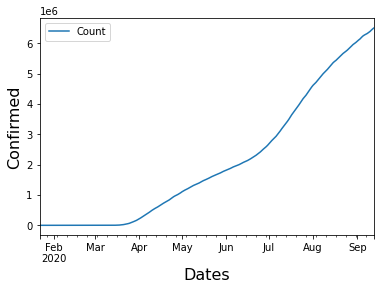

In [7]:
confirmed_m.groupby('Dates').sum().plot();
plt.ylabel('Confirmed', fontsize=16);
plt.xlabel('Dates', fontsize=16);

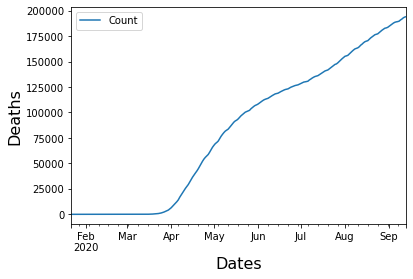

In [8]:
deaths_m.groupby('Dates').sum().plot();
plt.ylabel('Deaths', fontsize=16);
plt.xlabel('Dates', fontsize=16);

# 2. ETS decomposition

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose 

## 2.1 On Confirmed data

In [10]:
temp = confirmed_m.groupby('Dates').sum()[confirmed_m.groupby('Dates').sum()['Count']>=0]['Count']
result1 = seasonal_decompose(temp)

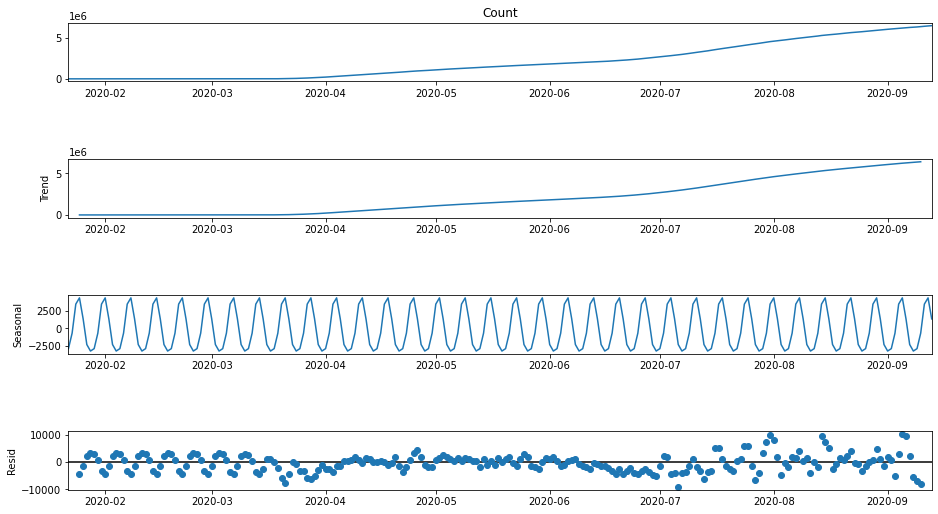

In [11]:
fig = result1.plot()
fig.set_size_inches(15,8)

## 2.2 On deaths data

In [12]:
temp = deaths_m.groupby('Dates').sum()[deaths_m.groupby('Dates').sum()['Count']>=0]['Count']
result2 = seasonal_decompose(temp)

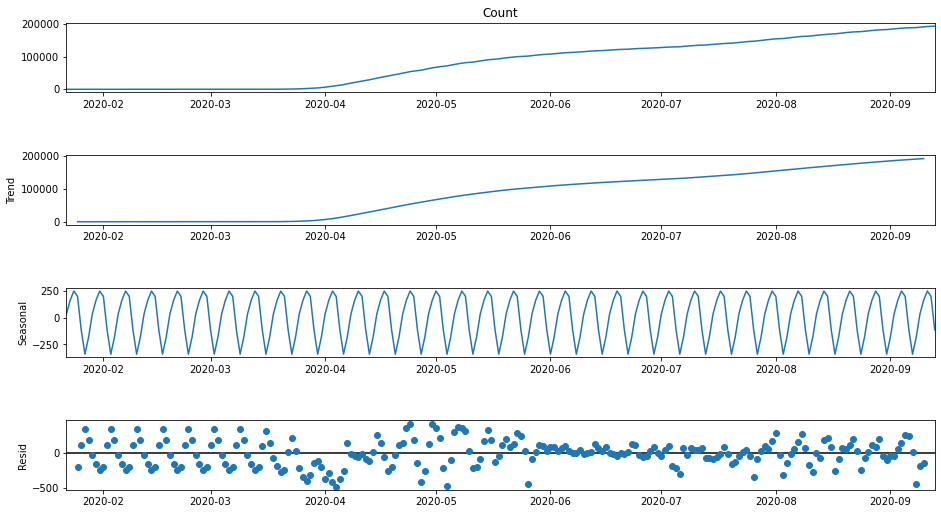

In [13]:
fig = result2.plot()
fig.set_size_inches(15,8)

# 3. Stationarity test

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
confirmed_to_fit = confirmed_m.groupby('Dates').sum()[confirmed_m.groupby('Dates').sum()['Count']>=0]
confirmed_to_fit.head()

,Count
Dates,
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5


In [16]:
deaths_to_fit = deaths_m.groupby('Dates').sum()[deaths_m.groupby('Dates').sum()['Count']>=0]
deaths_to_fit.head()

,Count
Dates,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [17]:
def adf_check(time_series):

    #Pass in a time series, returns ADF report
    result = adfuller(time_series)
    
    print('Augmented Dickey-Fuller Test:')
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adf_check(confirmed_to_fit['Count'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.6513042313052532
p-value : 0.988814238947501
#Lags Used : 14
Number of Observations Used : 221
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
adf_check(deaths_to_fit['Count'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.2999083427859792
p-value : 0.9255173126120619
#Lags Used : 15
Number of Observations Used : 220
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# 4. Seasonal ARIMA model

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

## 4.1 For forecasting number of COVID-19 cases in the upcoming days

In [54]:
confirmed_to_fit = confirmed_m.groupby('Dates').sum()[confirmed_m.groupby('Dates').sum()['Count']>=0]

model = SARIMAX(confirmed_to_fit['Count'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\Python\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Python\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                Count   No. Observations:                  236
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -2196.868
Date:                              Mon, 19 Oct 2020   AIC                           4401.736
Time:                                      19:58:30   BIC                           4415.365
Sample:                                  01-22-2020   HQIC                          4407.238
                                       - 09-13-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    205.122      0.000       0.990       1.010
ar.S.L12      -0.24

C:\Users\Python\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Residual error for the model

<AxesSubplot:xlabel='Dates'>

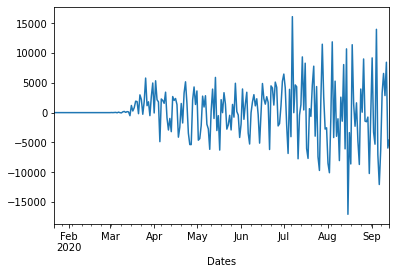

In [55]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

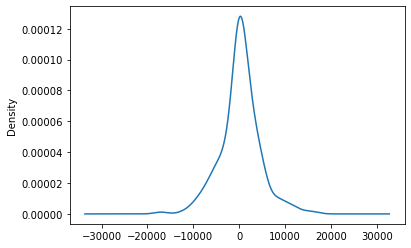

In [56]:
results.resid.plot(kind='kde')

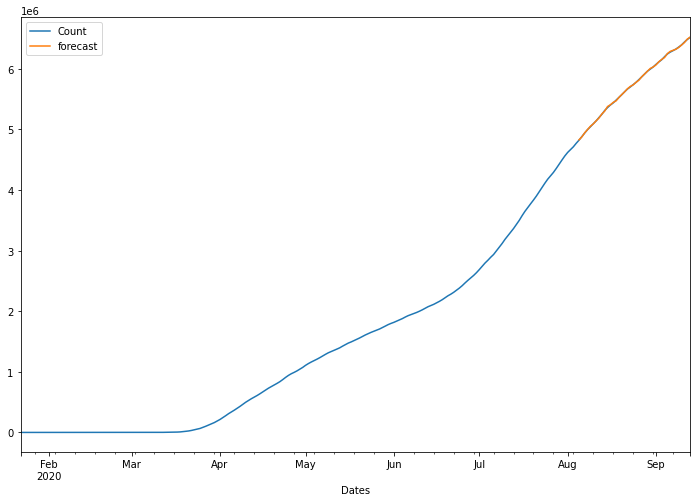

In [57]:
confirmed_to_fit['forecast'] = results.predict(start = 196, end= 236)  
confirmed_to_fit[['Count','forecast']].plot(figsize=(12,8));

In [58]:
from pandas.tseries.offsets import DateOffset

In [59]:
n = 60
last_date = confirmed_to_fit.index[-1]

future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

In [60]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=confirmed_to_fit.columns)
future_df = pd.concat([confirmed_to_fit,future_dates_df])
future_df.tail()

,Count,forecast
2020-11-07,NaN,NaN
2020-11-08,NaN,NaN
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN


<AxesSubplot:>

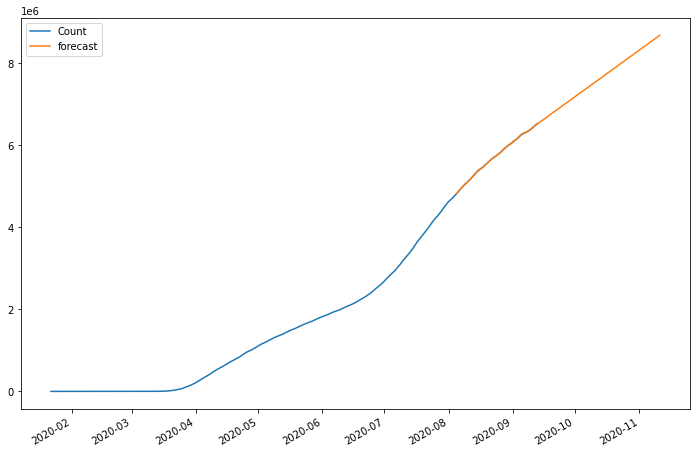

In [62]:
future_df['forecast'] = results.predict(start = 196, end = future_df.index[-1])  
future_df[['Count', 'forecast']].plot(figsize=(12, 8))

## 4.2 For forecasting the number of COVID-19 related deaths in the upcoming days

In [63]:
deaths_to_fit = deaths_m.groupby('Dates').sum()[confirmed_m.groupby('Dates').sum()['Count']>=0]

model = SARIMAX(deaths_to_fit['Count'],order=(1,1,0), seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

C:\Users\Python\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Python\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                Count   No. Observations:                  236
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1579.337
Date:                              Mon, 19 Oct 2020   AIC                           3166.674
Time:                                      20:03:00   BIC                           3180.303
Sample:                                  01-22-2020   HQIC                          3172.176
                                       - 09-13-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9656      0.018     53.945      0.000       0.931       1.001
ar.S.L12      -0.36

Residual error for the model

<AxesSubplot:xlabel='Dates'>

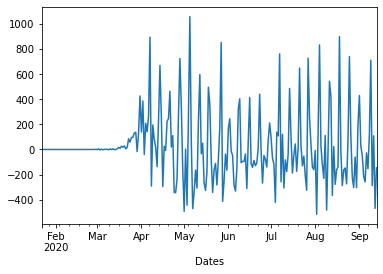

In [64]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

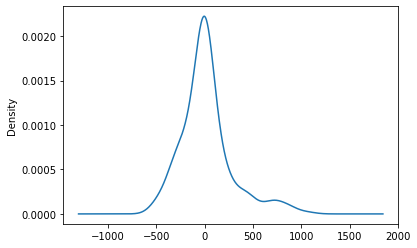

In [65]:
results.resid.plot(kind='kde')

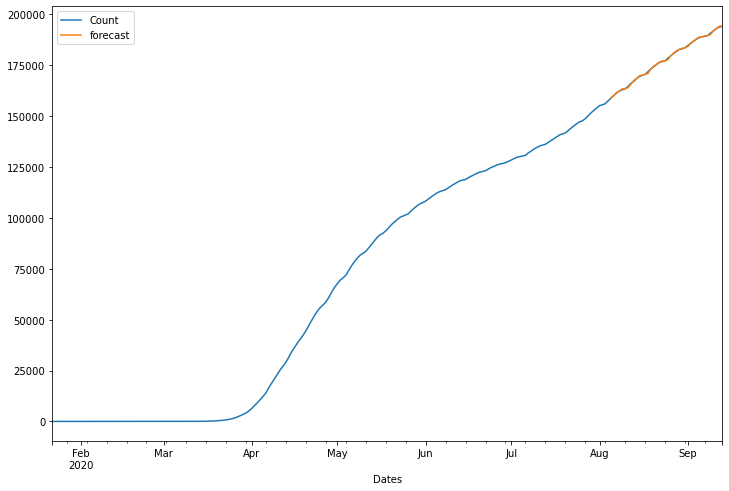

In [66]:
deaths_to_fit['forecast'] = results.predict(start = 196, end= 236)  
deaths_to_fit[['Count','forecast']].plot(figsize=(12,8));

In [67]:
n = 60
last_date = deaths_to_fit.index[-1]

future_dates = [last_date+DateOffset(days=x) for x in range(1, n)]

In [68]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=deaths_to_fit.columns)
future_df = pd.concat([deaths_to_fit,future_dates_df])
future_df.tail()

,Count,forecast
2020-11-07,NaN,NaN
2020-11-08,NaN,NaN
2020-11-09,NaN,NaN
2020-11-10,NaN,NaN
2020-11-11,NaN,NaN


<AxesSubplot:>

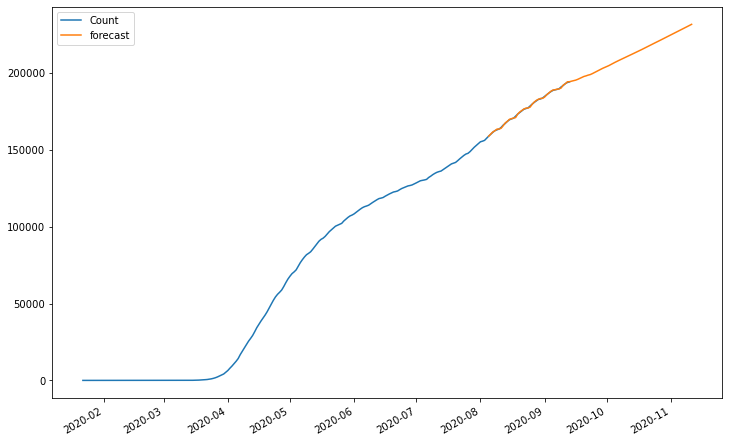

In [69]:
future_df['forecast'] = results.predict(start = 196, end = future_df.index[-1])  
future_df[['Count', 'forecast']].plot(figsize=(12, 8))